# Convolutional Neural Network (CNN) Implementation using the dataset MINIST

The MNIST dataset is comprised of 70000 28 pixels by 28 pixels images of handwritten digits and 70000 vectors containing information on which digit each one is.

### Setup

Importing Necessary Modules/Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense, Conv2DTranspose, Reshape, Lambda, Activation, BatchNormalization, LeakyReLU, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint 
from tensorflow.keras.utils import plot_model
from sklearn.metrics import confusion_matrix #Basic Machine Learning library
import pandas as pd #Dataframes managment library
import seaborn as sns #Data Visualization library
from PIL import Image

### Importing data 

Load dataset from Keras database [mnist Keras](https://keras.io/examples/vision/mnist_convnet/)

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data() #Dataset split
train_x = x_train.astype("float32") / 255 #Normalization
test_x = x_test.astype("float32") / 255 #Normalization

### Data exploration


The label of this sample is 5


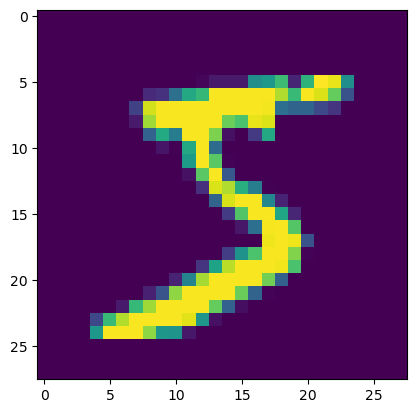

In [3]:
sample = 0 #Sample label
plt.imshow(x_train[sample]); #2D array visualization function
print("\nThe label of this sample is",np.squeeze(y_train[sample]))

In [4]:
y_train.reshape(-1) #Current form of labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

The sample 0 corresponds to  5
Its one-hot representation is = [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


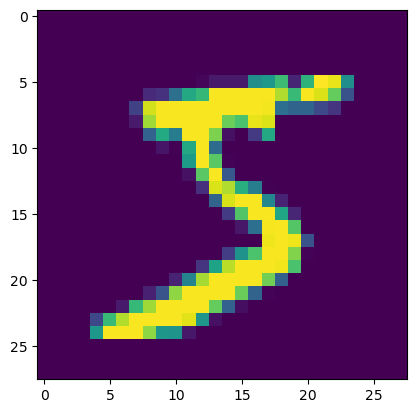

In [5]:
train_y=tf.keras.utils.to_categorical(y_train, num_classes=10, dtype="float32") #Transform to a vector of 0 and 1 
test_y=tf.keras.utils.to_categorical(y_test, num_classes=10, dtype="float32")#Transform to a vector of 0 and 1 

plt.imshow(train_x[sample]); #Visualice sample

print('The sample', sample, 'corresponds to ', int(np.argmax(train_y[sample])))
print("Its one-hot representation is =", train_y[sample])

### Convolutional Neural Network (CNN) architecture

We use a convolutional neural network based in the [mnist Keras](https://keras.io/examples/vision/mnist_convnet/) implementation

In [6]:
INPUT_DIM = (28,28,1)
NUM_CLASSES = 10

inputs = keras.Input(shape=INPUT_DIM)
x = layers.Conv2D(32, 5, strides=1, padding='same', activation='relu')(inputs)
x = layers.Conv2D(64, 5, strides=1, padding='same', activation='relu')(x)
x = layers.MaxPooling2D((2,2))(x)
x = layers.Dropout(0.26)(x)
x = layers.Flatten()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(NUM_CLASSES)(x)

model = keras.Model(inputs, x, name='MNIST_CNN')
model.summary()


Model: "MNIST_CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        51264     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                         

### Choosing hyperparameters and metrics

Set a proper learning rate along with a loss function and a metric to evaluate the performance of the network

In [7]:
optimizer = Adam(learning_rate = 0.0004) #Gradient descent
loss_function = tf.keras.losses.BinaryCrossentropy(from_logits=True) #Measure of uncertanty between two distributions
metric_function = 'accuracy' 
model.compile(optimizer = optimizer, loss = loss_function, metrics = [metric_function]) 
train_x = np.expand_dims(train_x, -1) #Unfold matrix
test_x = np.expand_dims(test_x, -1) #Unfold matrix

### Training

In [8]:
validation_portion = 0.1 #Data not considered for training but to validate the output of the neural network classification
batch_size=128 #Size of the data considered in training  
num_epochs = 15 #How many times we are training the algorithm
history = model.fit(x=train_x, y=train_y, epochs=num_epochs, batch_size=batch_size, validation_split=validation_portion, verbose=1)

Epoch 1/15
422/422 [==============================] - 25s 44ms/step - loss: 0.0959 - accuracy: 0.8434 - val_loss: 0.0160 - val_accuracy: 0.9792
Epoch 2/15
422/422 [==============================] - 17s 39ms/step - loss: 0.0284 - accuracy: 0.9635 - val_loss: 0.0101 - val_accuracy: 0.9840
Epoch 3/15
422/422 [==============================] - 16s 38ms/step - loss: 0.0204 - accuracy: 0.9736 - val_loss: 0.0083 - val_accuracy: 0.9875
Epoch 4/15
422/422 [==============================] - 16s 39ms/step - loss: 0.0161 - accuracy: 0.9804 - val_loss: 0.0082 - val_accuracy: 0.9873
Epoch 5/15
422/422 [==============================] - 16s 38ms/step - loss: 0.0140 - accuracy: 0.9825 - val_loss: 0.0068 - val_accuracy: 0.9900
Epoch 6/15
422/422 [==============================] - 16s 39ms/step - loss: 0.0122 - accuracy: 0.9848 - val_loss: 0.0068 - val_accuracy: 0.9907
Epoch 7/15
422/422 [==============================] - 17s 41ms/step - loss: 0.0109 - accuracy: 0.9871 - val_loss: 0.0068 - val_accuracy:

### Plot learning curves

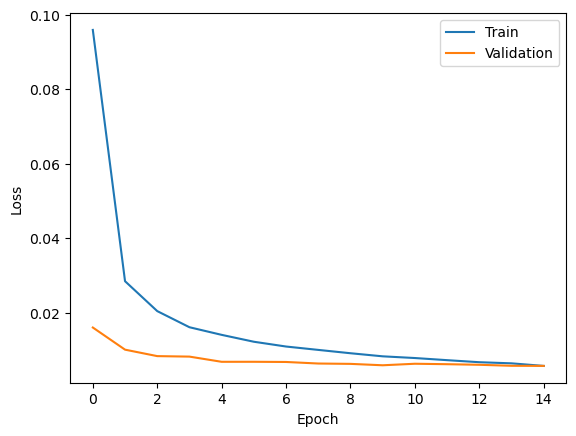

In [9]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

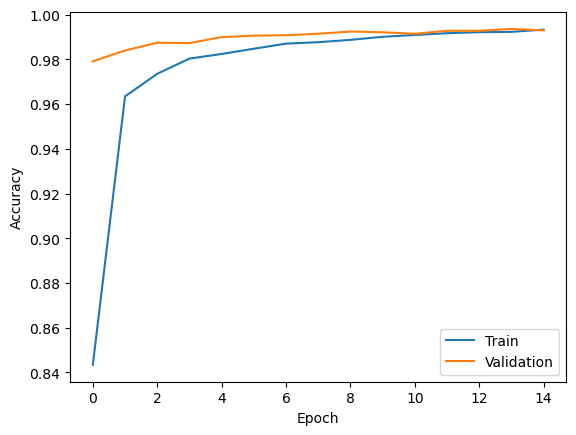

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

### Evaluate the model on our test set

In [11]:
evaluations = model.evaluate(x = test_x, y = test_y) #Use test sets not included in training 

print ("Loss = " + str(evaluations[0])) 
print ("Test Accuracy = " + str(evaluations[1]))

313/313 [==============================] - 2s 7ms/step - loss: 0.0049 - accuracy: 0.9933
Loss = 0.004885031841695309
Test Accuracy = 0.9933000206947327


### Use CNN model to predict test set labels

313/313 [==============================] - 2s 4ms/step
The prediction of this sample labeled as  3 is  3


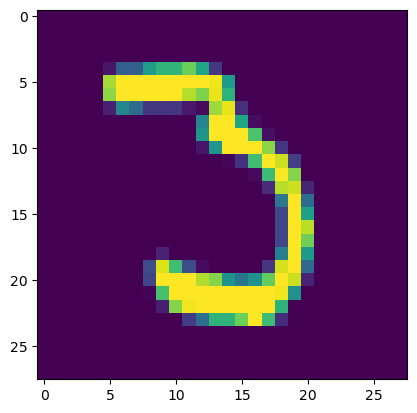

In [12]:
predictions = model.predict(test_x) #For each number in the test use our model to predict its label
sample = 158
prediction = np.argmax(predictions[sample]) #Specific prediction for the choosen sample
plt.imshow(test_x[sample,:,:,0]) 

print('The prediction of this sample labeled as ', int(np.argmax(test_y[sample])), 'is ', prediction)

### Confusion Matrix of the predicted labels across the whole test set

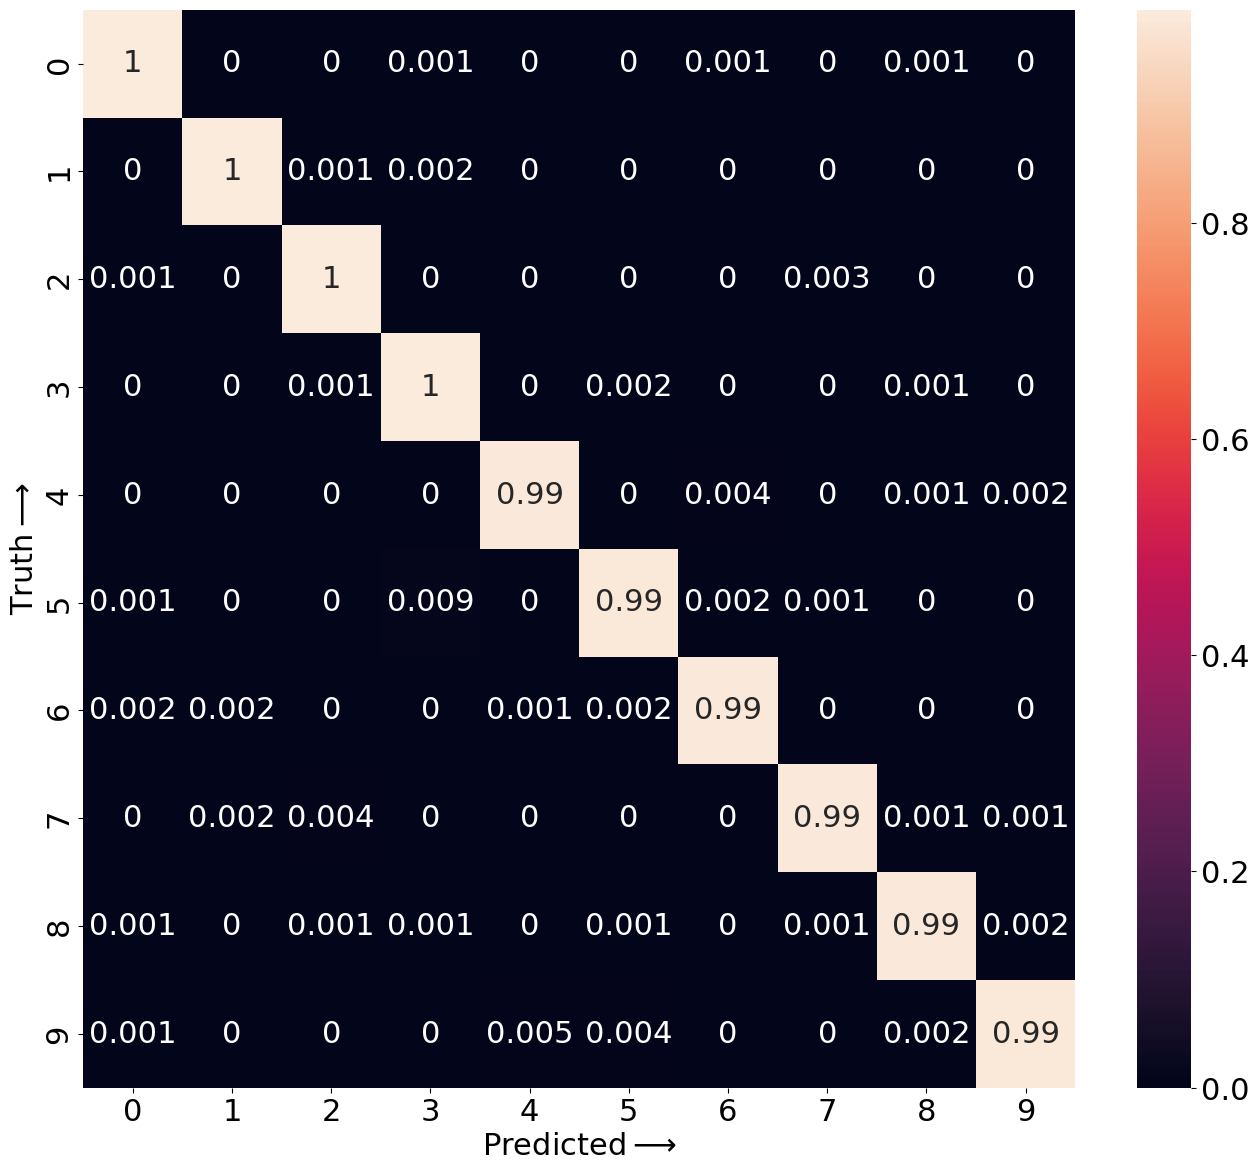

In [13]:
predictions_array =np.array([np.argmax(predictions[i]) for i in range(len(y_test))]) #Array of all predicted labels
cm =np.around(confusion_matrix(y_true = y_test, y_pred = predictions_array, normalize = 'true'), decimals=3) #Confusion matrix array
df_cm = pd.DataFrame(cm, index = [i for i in range(0,10)], columns = [i for i in range(0,10)]) #Confusion matrix array turned into a dataframe
plt.figure(figsize = (16,14))
plt.rcParams.update({'font.size': 22})
ax = sns.heatmap(df_cm, annot=True)
ax.set(xlabel=r'Predicted$\longrightarrow$', ylabel=r'Truth$\longrightarrow$');

### Import Self Drawn Test Numbers 

In [14]:
import kaggle

In [15]:
!kaggle datasets download -d hilkar/mnist-self-drawn-test-numbers

mnist-self-drawn-test-numbers.zip: Skipping, found more recently modified local copy (use --force to force download)


In [16]:
#Unzip the dataset downloaded from kaggle
from zipfile import ZipFile
with ZipFile('mnist-self-drawn-test-numbers.zip', 'r') as zipObj:
   # Extract all the contents of zip file in the data directory
   zipObj.extractall('./MNIST_Test/')

In [17]:
test_x_2 = np.array([np.array(Image.open('MNIST_Test/MNIST_Self_Drawn_Test_Numbers/%1i_%1i.png'%(i,j)).resize((28,28)))[:,:,:1]/255 for i in range(0,10) for j in range(1,11)])
y_test_2 = [i for i in range(10) for j in range(10)]

### Use CNN model to predict self drawn test set labels

4/4 [==============================] - 0s 84ms/step
The prediction of this sample labeled as  8 is  6


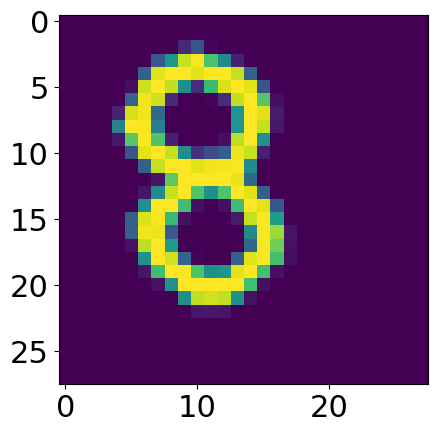

In [18]:
predictions_2 = model.predict(test_x_2) #For each number in the test use our model to predict its label
sample = 84
prediction = np.argmax(predictions_2[sample]) #Specific prediction for the choosen sample
plt.imshow(test_x_2[sample,:,:,0]) 

print('The prediction of this sample labeled as ', int(y_test_2[sample]), 'is ', prediction)

### Confusion Matrix of the predicted labels across the whole self drawn test set

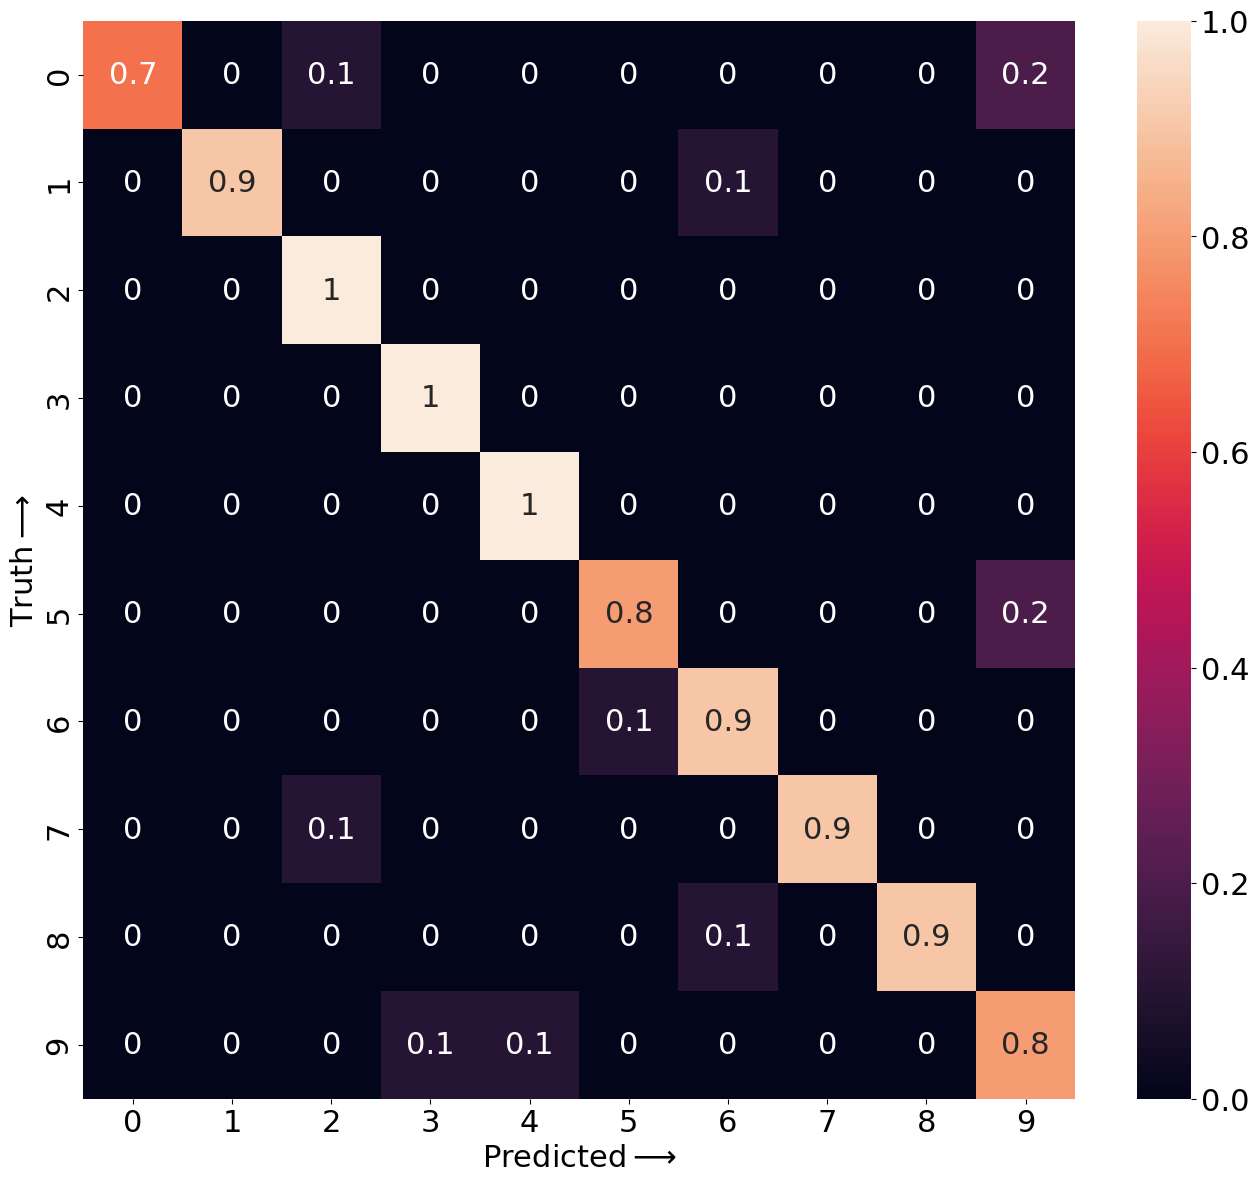

In [19]:
predictions_array_2 =np.array([np.argmax(predictions_2[i]) for i in range(len(y_test_2))]) #Array of all predicted labels
cm =np.around(confusion_matrix(y_true = y_test_2, y_pred = predictions_array_2, normalize = 'true'), decimals=3) #Confusion matrix array
df_cm = pd.DataFrame(cm, index = [i for i in range(0,10)], columns = [i for i in range(0,10)]) #Confusion matrix array turned into a dataframe
plt.figure(figsize = (16,14))
plt.rcParams.update({'font.size': 22})
ax = sns.heatmap(df_cm, annot=True)
ax.set(xlabel=r'Predicted$\longrightarrow$', ylabel=r'Truth$\longrightarrow$');